# <center>**Course Project 2** </center>

**Policy**

1. You may use your own or any software packages/module/codes to do this project. 
2. The project has to be done in groups of 2-4 persons each working together to complete all the tasks. The team can be the same as the Project 1 or re-formed.  
4. The report should be no more than 20 pages, including one page describing the contributions of each of the members in the group, figures, tables and codes. 
5. You are encouraged to do beyond the described tasks along with the central topic. Quality and innovative work will be greatly rewarded. 


Consider a penetration of a bullet onto a plate, as shown in the following figure. 

<div>
<br>
<img src="../../../images/Penetration.png" width="300"/>
<br>
[A bullet penetrated a circular plate]
</div>

Study the paper entitle "Real-time prediction of projectile penetration to laminates by training machine learning models with finite element solver as the trainer" given in the file holder of the course website. The dataset for this study was generated from a large number of FEM analyses for a real research project, and it is given also in the file folder. The Python code for the neural network is given there as Neural_network_FEA.py. Note that this neural network model is for predicting the entire time history of the velocity of the bullet, before and after the penetration. Before doing your tasks before, you should try to repeat the work on NN first using exactly the same dataset and codes.  

1. Establish a new NN model to predict only the residual velocity of the bullet, using the given dataset, aiming to outperform the one in the paper. Note that for the penetrated cases, the residual velocity will still be positive. For the not-penetrated cases, it is negative because the bullet is bounced back. 

2. Establish any other alternative model to repeat Task 1. 

3. Discuss on what type of ML model work best for this type of data.

You may use any existing 3rd party ML module or your own code to get this tasks done. 

Please submit both codes and reports online by the deadline. No extension will be given, because this is the final project. 

11/11 [==============================] - 0s 3ms/step


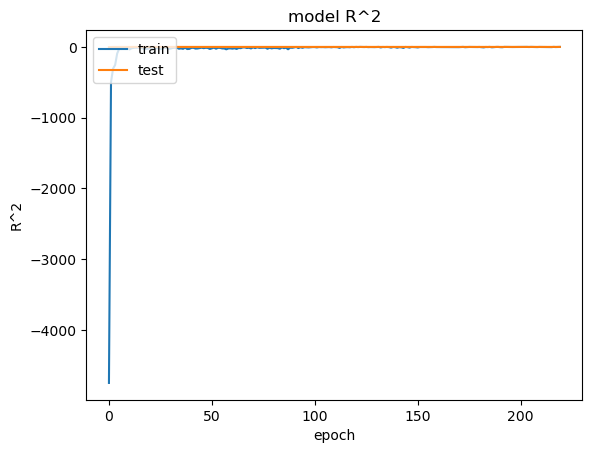

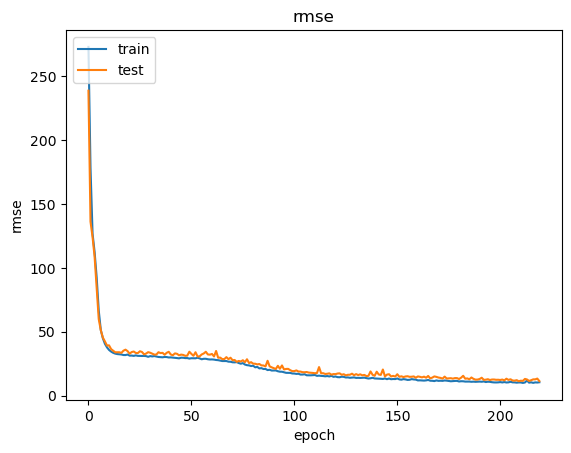

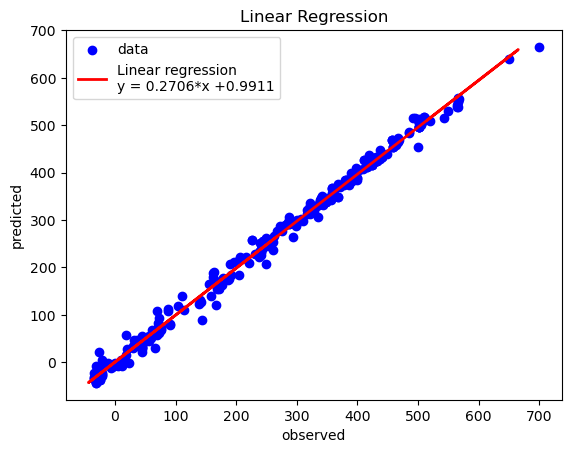

11/11 [==============================] - 0s 2ms/step - loss: 165.2122 - mean_squared_error: 165.2122 - rmse: 9.4944 - r_square: 0.9940
R_squared value:  0.9911
RMSE:  12.853488172598324
Computation Time: 64.62722897529602 s


In [45]:
# Thesis code Neural Network- Finite Element Dataset
# Author- Pushkar Wadagbalkar
# ************************************************************************************

# importing all the required python libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression  
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import time

# root mean squared error (rmse) for regression (only for Keras tensors)
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# coefficient of determination (R^2) for regression  (only for Keras tensors)
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# importing training dataset and target files
dataset = pd.read_csv('./Finite_element_entire_data_set.csv')
X = dataset.iloc[:, :].values
Y = dataset.iloc[:, 5].values
X = np.delete(X, 5, 1)

# Column Transfer and one hot encoding for categorical features
ct = ColumnTransformer(
    transformers=[("oh", OneHotEncoder(), [2, 3, 4])], remainder="passthrough")
X = ct.fit_transform(X)
X = np.asarray(X).astype('float32')
# fig, (ob1, ob2) = plt.subplots(ncols=2, figsize=(10, 10))
# ob1.set_title('Before Scaling')
# sns.kdeplot(dataset['Time'], ax=ob1)
# sns.kdeplot(dataset['Velocity'], ax=ob1)
# Feature scaling using MinMaxScaler
sc = preprocessing.MinMaxScaler(feature_range=(0, 1))
X[:, [10, 11]] = sc.fit_transform((X[:, [10, 11]]))
Z = pd.DataFrame(X)
# Plotting the KDE plot for data after feature scaling
scaled = Z.iloc[:, :]
# ob2.set_title('After Scaling')
# sns.kdeplot(scaled[10], ax=ob2)
# sns.kdeplot(scaled[11], ax=ob2)
# Splitting the training data from the unseen inputs for which predictions are to be made
Train = Z.iloc[0:3221]
Input = Z.iloc[3221::]

# Splitting the data into training, validation and testing datasets
train_x, test_x, train_y, test_y = train_test_split(
    Train, Y, test_size=0.20, random_state=0)
validation_x, testing_x, validation_y, testing_y = train_test_split(
    test_x, test_y, test_size=0.50, random_state=0)

# importing and implementing Neural network regression model
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(12,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1,))
model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error", rmse, r_square])
# Compiling the model with early stopping algorithm
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3,
                        patience=10, verbose=0, mode='auto')

start = time.time() # Check start time

# Computing training and validation loss for the network
history = model.fit(train_x, train_y, validation_data=(
    validation_x, validation_y), callbacks=[monitor], verbose=0, epochs=1000)
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Getting predictions for training dataset
y_train_pred = model.predict(train_x)
# Getting predictions for validation dataset
y_validation_pred = model.predict(validation_x)
# Getting predictions for testing dataset
final_result = model.predict(testing_x)
# Getting predictions for unseen inputs
# Unseen_result = model.predict(Input)
# Calculating relative error for validation dataset

end = time.time()# Get end time
totalt = end - start # Get elapsed time

Error = ((validation_y-y_validation_pred)/validation_y)


def average(Error):
    return sum(abs(Error))/len(Error)


Relative_Error = average(Error)
# Calculating relative error for testing dataset
Error_testing = ((testing_y-final_result)/testing_y)


def average(Error_testing):
    return sum(abs(Error_testing))/len(Error_testing)



Testing_Relative_Error = average(Error_testing)

# Calculate accuracy and error metrics 

# plot training curve for R^2 (beware of scale, starts very low negative)
plt.plot(history_dict['val_r_square'])
plt.plot(history_dict['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
           
# plot training curve for rmse
plt.plot(history_dict['rmse'])
plt.plot(history_dict['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# print the linear regression and display datapoints
regressor = LinearRegression()  
regressor.fit(testing_y.reshape(-1,1), final_result)  
y_fit = regressor.predict(final_result) 

reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_intercept) + "*x +" + str(reg_coef)

plt.scatter(testing_y, final_result, color='blue', label= 'data')
plt.plot(final_result, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
plt.title('Linear Regression')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()

score = model.evaluate(testing_x, testing_y)
print('R_squared value: ', reg_coef)
print('RMSE: ', np.sqrt(score[0]))
print('Computation Time:',totalt,'s')

1) Neural Network Solution

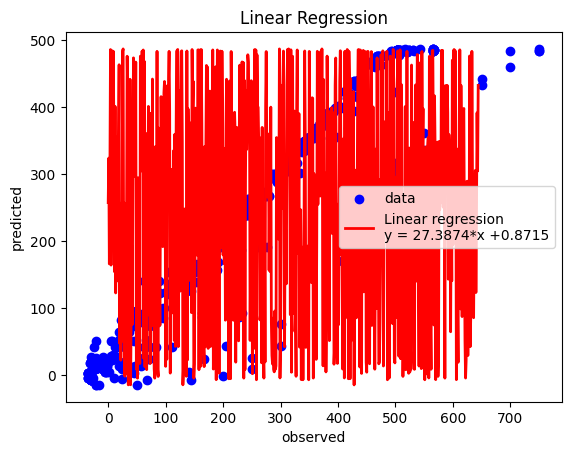

R_squared value:  0.9288843140640402
RMSE:  49.22545149905049
Computation Time: 21.209611177444458 s


In [4]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import pandas as pd
import time

# Open file utilizing pandas module for data frames
df = pd.read_csv('./Finite_element_entire_data_set.csv', sep=',')

# Preform OHE
onehot = pd.get_dummies(df, drop_first=True)
X = onehot.to_numpy()
Y = onehot.iloc[:, 3].values
X = np.delete(X, 3, 1)


# Split the dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)
y_train = y_train.astype('int')
start = time.time() # Check start time 

#X_train = X_train.reshape(-1, 1)
#X_test = X_test.reshape(-1, 1)
#y_train = y_train.reshape(-1,1)

# Train Data
clf = MLPRegressor(
    activation='tanh',
    solver='adam',
    hidden_layer_sizes=(100, 100),
    alpha=0.001,
    random_state=0,
    early_stopping=False,
    max_iter=10000
).fit(X_train, y_train)

# Predictions and testing/training
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

end = time.time()# Get end time
totalt = end - start # Get elapsed time

# Calculate accuracy and error metrics
test_set_rsquared = clf.score(X_test, y_test)
test_set_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


# print the linear regression and display datapoints
regressor = LinearRegression()  
regressor.fit(y_test.reshape(-1,1), y_test_pred.reshape(-1,1))  
y_fit = regressor.predict(y_test_pred.reshape(-1,1)) 

reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_intercept) + "*x +" + str(reg_coef)

plt.scatter(y_test, y_test_pred, color='blue', label= 'data')
plt.plot(y_test_pred, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
plt.title('Linear Regression')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()

print('R_squared value: ', test_set_rsquared)
print('RMSE: ', test_set_rmse)
print('Computation Time:',totalt,'s')


2) Alt-Model (SVM Regression)

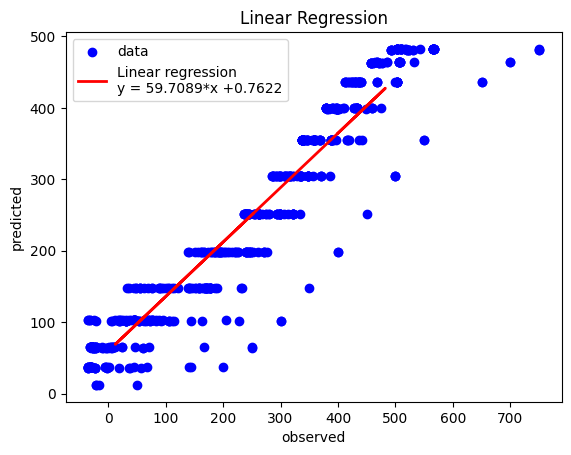

R_squared value:  0.8889380559916655
RMSE:  61.516220088465936
Computation Time: 3.328307628631592 s


In [5]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Open file utilizing pandas module for data frames
df = pd.read_csv('./Finite_element_entire_data_set.csv', sep=',')

# Preform OHE
onehot = pd.get_dummies(df, drop_first=True)
X = onehot.to_numpy()
y = onehot.iloc[:, 3].values
X = np.delete(X, 3, 1)


# Split the dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
regressor = SVR(kernel='rbf')

start = time.time() # Check start time 

regressor.fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

end = time.time()# Get end time
totalt = end - start # Get elapsed time

# Calculate accuracy and error metrics
test_set_rsquared = regressor.score(X_test, y_test)
test_set_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# print the linear regression and display datapoints
regressor = LinearRegression()  
regressor.fit(y_test.reshape(-1,1), y_test_pred.reshape(-1,1))  
y_fit = regressor.predict(y_test_pred.reshape(-1,1)) 

reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_intercept) + "*x +" + str(reg_coef)

plt.scatter(y_test, y_test_pred, color='blue', label= 'data')
plt.plot(y_test_pred, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
plt.title('Linear Regression')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()
print('R_squared value: ', test_set_rsquared)
print('RMSE: ', test_set_rmse)
print('Computation Time:',totalt,'s')

3. Type of ML model best for this type of data.